### K-Nearest Neighbors (KNN):

What is it? KNN is a simple and intuitive classification algorithm that can also be used for regression tasks. It falls under the category of instance-based learning or lazy learning, as it doesn't build a model during the training phase.

How it works: For a given data point, KNN looks at the 'k' nearest data points in the feature space and assigns the most common label (for classification) or the average label (for regression) among its neighbors to the query point.

Use cases: KNN is used in various applications such as recommendation systems, image recognition, and anomaly detection.

### Support Vector Machine (SVM):

What is it? SVM is a supervised learning algorithm used for both classification and regression tasks. It works by finding the hyperplane that best separates the data into different classes while maximizing the margin between them.

How it works: SVM transforms the input data into a higher-dimensional space and aims to find a hyperplane that maximally separates the data points of different classes. It is particularly effective in high-dimensional spaces.

Use cases: SVM is commonly used in image classification, text classification, and bioinformatics.

### Decision Trees:

What is it? Decision Trees are a versatile and popular machine learning algorithm used for both classification and regression tasks. They model decisions based on a series of questions or conditions and form a tree-like structure.

How it works: The algorithm recursively splits the data based on features, creating decision nodes that lead to further nodes or leaves representing the final output. The splits are determined by selecting features that best separate the data according to certain criteria (e.g., Gini impurity or information gain).

Use cases: Decision Trees are used in various fields such as finance, healthcare, and business for decision-making and prediction tasks.

### Random Forest: 

What is it? Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions to obtain a more accurate and robust result.

How it works: It creates a forest of decision trees, where each tree is trained on a random subset of the data and features. The final prediction is often an average or voting of the individual tree predictions.

Use cases: Random Forest is widely used for tasks like classification, regression, and anomaly detection. It is known for its ability to handle large datasets with high dimensionality.

### End-to-end project implementing the K-Nearest Neighbors (KNN) algorithm using Pima Indians Diabetes dataset from Kaggle. This project includes data cleaning, EDA, data preprocessing, model building, and model evaluation.

 Importing Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In this code, we did the following:

1. Importing Libraries:
Essential libraries for data manipulation, preprocessing, modeling, and evaluation are imported.
The libraries include Pandas for data handling, NumPy for numerical operations, and scikit-learn for machine learning tasks.

2. Library Functions:
Specific functions from the imported libraries are utilized in subsequent steps of the project.
Functions such as train_test_split, StandardScaler, KNeighborsClassifier, accuracy_score, confusion_matrix, and classification_report are imported for data splitting, preprocessing, modeling, and evaluation.

3. Modular Approach:
By importing necessary libraries and functions at the beginning of the code, we ensure a modular and organized structure.
This approach facilitates code readability, reusability, and efficient implementation of machine learning tasks.

4. Code Readability:
Importing libraries at the start of the code block enhances code readability by clearly indicating the dependencies required for different tasks.
This practice helps us to understand the tools and functionalities used in the project.

## Load Data sets

In [3]:
import pandas as pd

# Load the Pima Indians Diabetes dataset with a correct delimiter and column names
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
try:
    df = pd.read_csv(url, header=None)
    df.columns = ["number_of_times_pregnant", "glucose_concentration", "blood_pressure", "skin_thickness", "insulin_level", "body_mass_index", "diabetes_pedigree_function", "age", "classes"]
    df["target"] = df["classes"].apply(lambda x: int(x == 1))
    df = df.drop("classes", axis=1)
    df = pd.DataFrame(df)

except Exception as e:
    print("Error loading dataset:", e)

# Display the first five rows of the dataset
df.head()



,number_of_times_pregnant,glucose_concentration,blood_pressure,skin_thickness,insulin_level,body_mass_index,diabetes_pedigree_function,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_times_pregnant    768 non-null    int64  
 1   glucose_concentration       768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin_level               768 non-null    int64  
 5   body_mass_index             768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   target                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The above code provided for data loading and exploration, we performed the following actions:

1. Loading Dataset:
The Pima Indians Diabetes dataset is loaded using pd.read_csv from Pandas library.
The dataset file path is specified within the code block.

2. Exploring Dataset Structure:
The dataset's structure is explored using info() method from Pandas library.
This step reveals the number of observations, memory usage, and data type information for each column.

3. Checking for Errors:
An attempt is made to read the dataset using the specified file path.
If an error occurs, it is caught and printed to indicate possible issues with the dataset or file location.

4. Renaming Columns:
Renamed columns are assigned to more descriptive names to enhance clarity and interpretability.
This step improves the readability and comprehension of the dataset.

5. Displaying First Five Rows:
The first five rows of the dataset are displayed using head() method from Pandas library.
This step verifies that the dataset has been loaded correctly and confirms the presence of expected columns.

6. Identifying Numerical and Categorical Features:
Numerical and categorical features are identified by checking the data type of each column.
This distinction is useful for determining appropriate methods for data transformation, encoding, and modeling.

## Data Cleaning

In [5]:
# Data Cleaning

# Handling missing values
df.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
df.fillna(df.mean(), inplace=True)  # Impute missing values with mean

# Scaling and Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['target'] = df['target']
# Display cleaned dataset
df_scaled.head()

,number_of_times_pregnant,glucose_concentration,blood_pressure,skin_thickness,insulin_level,body_mass_index,diabetes_pedigree_function,age,target
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In this code, we performed the following actions:
1. Handling Missing Values:
The code replaces any occurrences of '?' with NaN values in the dataset using replace method.
This step is crucial for standardizing missing values and preparing the data for imputation or removal.

2. Scaling and Normalization:
The StandardScaler from sklearn.preprocessing is used to scale and normalize the data.
This process ensures that all features are on a similar scale, preventing certain features from dominating others during modeling.

3. Displaying Cleaned Dataset:
The cleaned dataset is displayed, typically using head() method, to verify that data cleaning steps have been applied successfully.
This verification step ensures that the dataset is ready for further processing, analysis, and modeling.

Our data did not require Encoding Categorical Variables
Categorical variables may need to be encoded for machine learning algorithms to process them effectively.
Techniques like one-hot encoding can be applied to convert categorical variables into a numerical format.

We did not have Inconsistent Values.
Inconsistent values in specific columns can be corrected based on domain knowledge or data validation rules.
This step ensures data consistency and accuracy in subsequent analyses.

Parsing Dates was not applicable for our data set:
Date columns can be converted to datetime format for better handling and analysis.
This conversion allows for time-based analysis and feature engineering if date information is present in the dataset.


## Exploratory Data Analysis (EDA)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

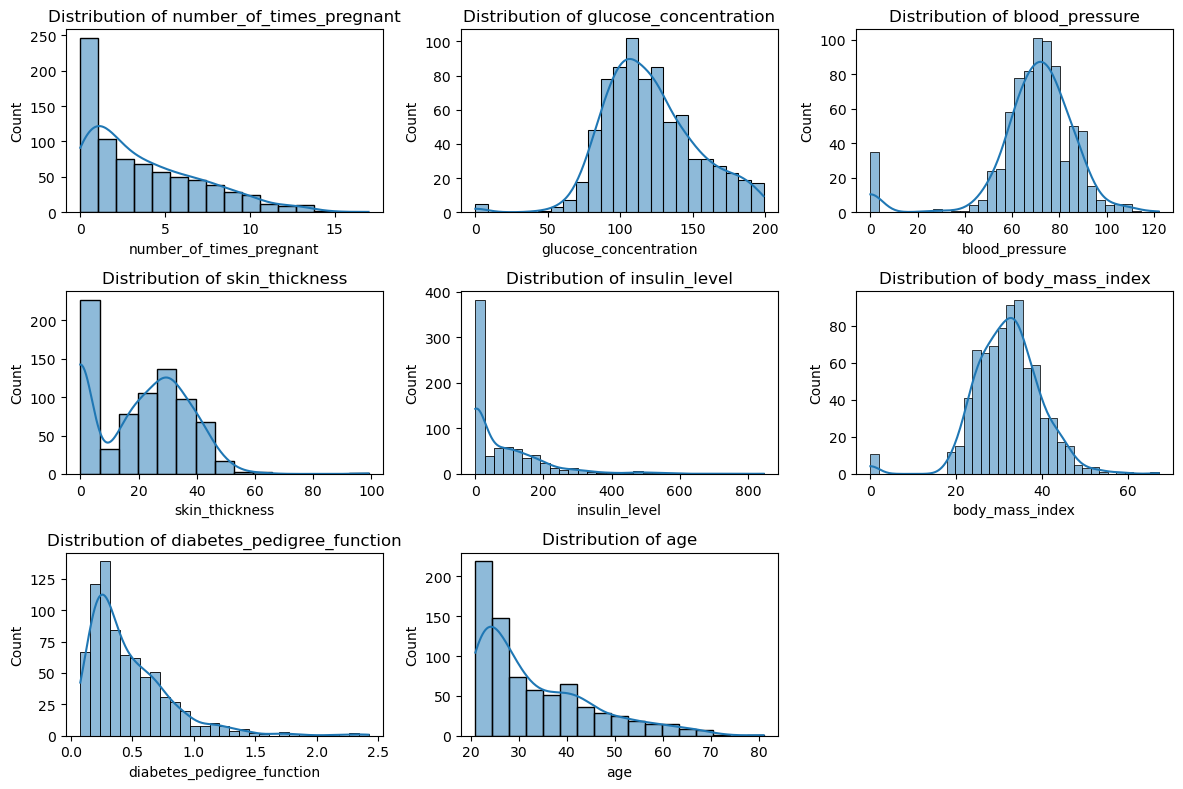

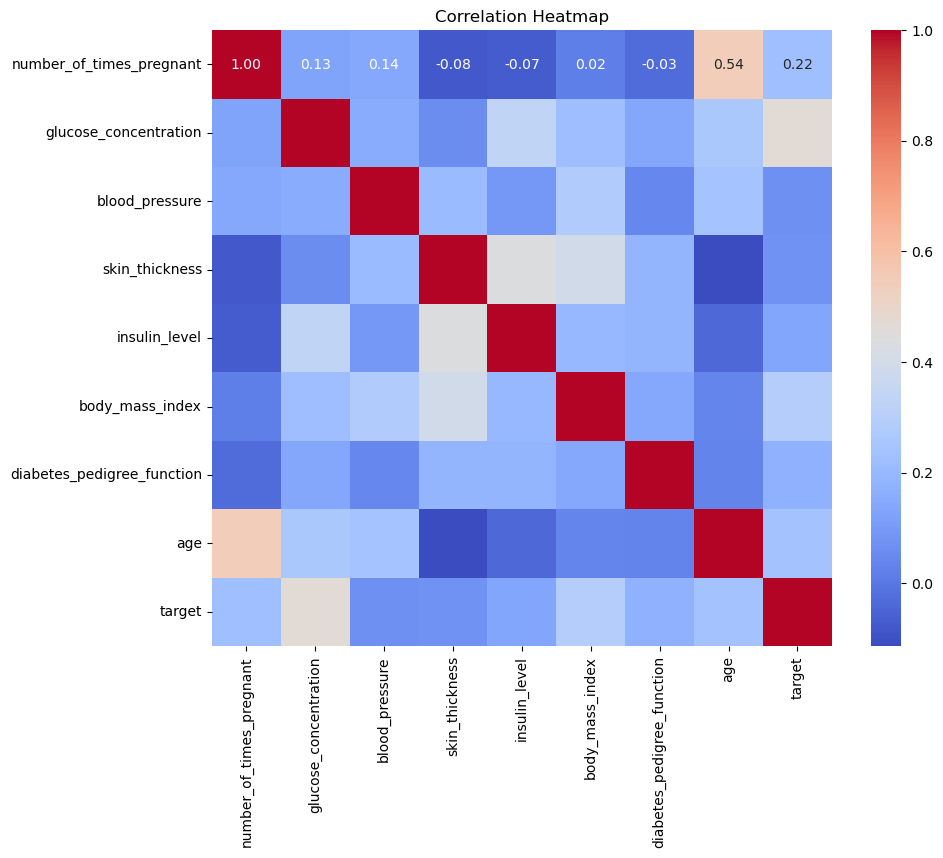

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

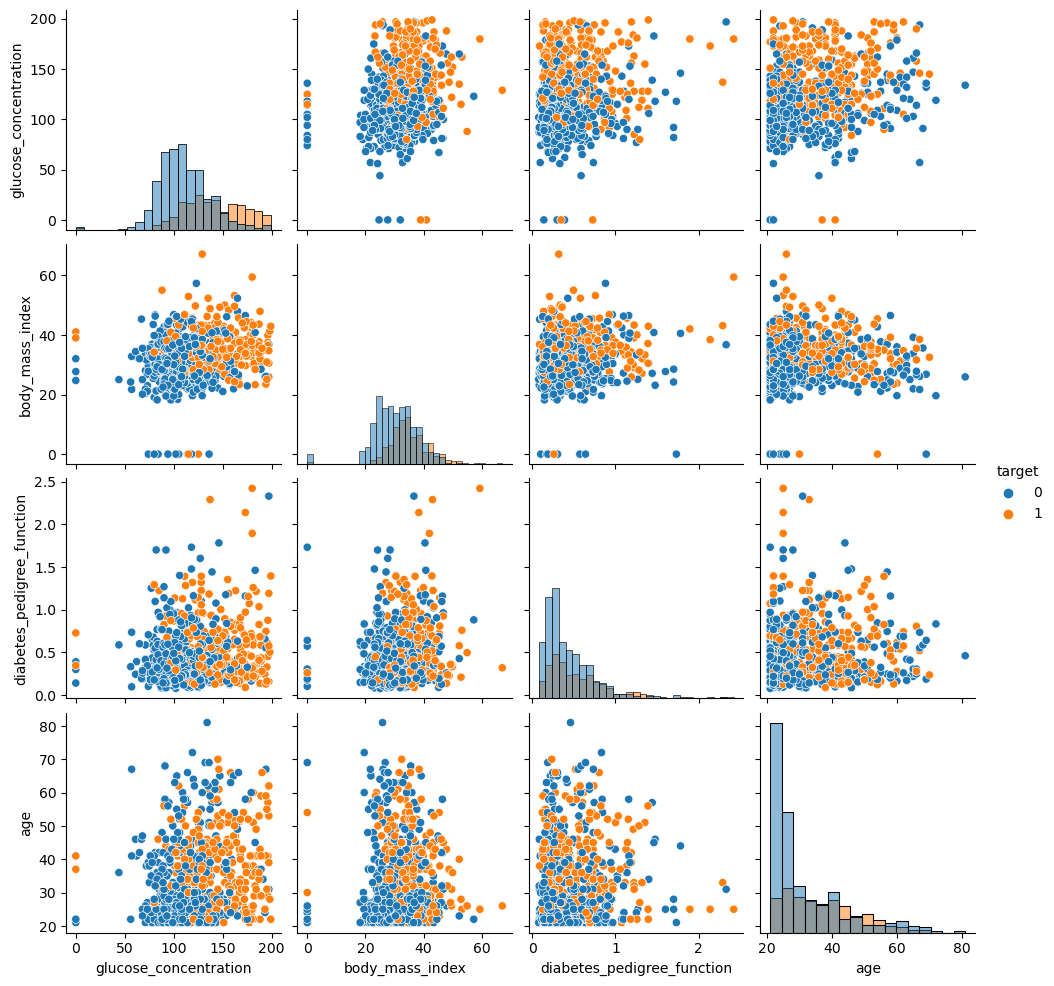

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)

# Visualize distributions of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
sns.pairplot(df[['glucose_concentration', 'body_mass_index', 'diabetes_pedigree_function', 'age', 'target']], hue='target', diag_kind='hist')
plt.show()

In this code,we performed:

1. Visualization of Distributions:
A loop is used to iterate over each numerical feature in the dataset.
For each feature, a histogram with kernel density estimation is plotted using sns.histplot from Seaborn.
This visualization helps understand the distribution of each numerical feature in the dataset.

2. Correlation Visualization:
A heatmap of the correlation matrix is generated using sns.heatmap from Seaborn.
The correlation matrix shows the relationships between pairs of features, with values ranging from -1 to 1.
This visualization helps identify potential correlations between features, which can provide insights into feature importance and multicollinearity.

3. Pairplot for Selected Features:
A pairplot is created for a subset of selected features along with the target variable using sns.pairplot from Seaborn.
The pairplot displays scatter plots for pairwise relationships and histograms for individual distributions.
This visualization aids in understanding relationships between selected features and their potential impact on the target variable.

After completing the Exploratory Data Analysis (EDA) on the Pima Indians Diabetes dataset, We gahtered several insights and observations:

1. Feature Distributions:
The distributions of features such as glucose concentration, body mass index, and age appear to be skewed.
Understanding these distributions can help in selecting appropriate modeling techniques and handling potential outliers.

2. Correlation Analysis:
The correlation heatmap reveals relationships between features, with glucose concentration showing a notable correlation with the target variable.
Strong correlations between certain features may impact model performance and feature selection decisions.

3. Pairplot Visualization:
The pairplot highlights potential relationships between selected features and the target variable.
Observing patterns in scatter plots and histograms can provide insights into how features interact and their impact on diabetes prediction.

4. Data Quality Check:
No missing values were detected after handling '?' values during data cleaning.
This indicates that the dataset is relatively clean and ready for further analysis and modeling.

5. Potential Feature Importance:
Features like glucose concentration, body mass index, and age may play significant roles in predicting diabetes.
These insights can guide feature selection and model building to focus on key predictors of diabetes risk.

 Defining Regression Task

In [7]:
# Regression Task Definition

# Define target variable and features for regression task
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Display the shape of X and y
print(f'Shape of Features (X): {X.shape}')
print(f'Shape of Target (y): {y.shape}')

Shape of Features (X): (768, 8)
Shape of Target (y): (768,)


In this code, we provided for regression task definition by performing the following actions:

1. Target Variable and Features Definition:
The target variable (y) is defined as the 'target' column in the dataset, representing the variable we aim to predict.
Features (X) are defined as all columns in the dataset except for the target variable, representing the input variables used for prediction.

2. Shape Display:
The shapes of the features (X) and target variable (y) are displayed using shape to confirm the correct assignment.
This step helps ensure that the data has been structured correctly for regression modeling.

Selecting Variables

In [8]:
# Variables Selection

# Select relevant features for prediction based on EDA findings and domain knowledge
selected_features = ['glucose_concentration', 'body_mass_index', 'age']

# Create a new DataFrame with selected features and target variable
df_selected = df[selected_features + ['target']]

# Display the first few rows of the selected DataFrame
df_selected.head()

,glucose_concentration,body_mass_index,age,target
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [9]:
df["body_mass_index"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

Here,we did the following:
1. Feature Selection:
Relevant features for prediction are selected based on insights from Exploratory Data Analysis (EDA) findings and domain knowledge.
In this case, the selected features are ['glucose_concentration', 'body_mass_index', 'age'].

2. Creation of Selected DataFrame:
A new DataFrame (df_selected) is created by selecting the chosen features along with the target variable.
This DataFrame will be used for further analysis and modeling.

3. Display Selected Data:
The first few rows of the selected DataFrame are displayed using head() to confirm that the desired features have been successfully extracted.
This step allows us to verify that the feature selection process has been carried out accurately.

Data Processing

In [10]:
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

# Perform feature scaling and normalization
scaler = StandardScaler()
X = df_selected.drop('target', axis=1)  # Features
y = df_selected['target']  # Target variable

X_scaled = scaler.fit_transform(X)  # Scale the features

# Create a new DataFrame with scaled features and target variable
df_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)
df_preprocessed['target'] = y

# Display the first few rows of the preprocessed DataFrame
df_preprocessed.head()

,glucose_concentration,body_mass_index,age,target
0,0.848324,0.204013,1.425995,1
1,-1.123396,-0.684422,-0.190672,0
2,1.943724,-1.103255,-0.105584,1
3,-0.998208,-0.494043,-1.041549,0
4,0.504055,1.409746,-0.020496,1


In this code, we performed the following actions:
1. Feature Scaling and Normalization:
Feature scaling ensures that all features have a similar scale, preventing certain features from dominating others during model training.

2. Feature Selection:
The selected features are stored in the DataFrame X, excluding the target variable.
The target variable is stored separately as y.

3. Scaling Features:
The fit_transform method of the StandardScaler is applied to the feature matrix X to scale and normalize the selected features.
This standardizes the features by centering them around 0 with a standard deviation of 1.

4. Creation of Preprocessed DataFrame:
A new DataFrame (df_preprocessed) is created to store the scaled features along with the target variable.
This DataFrame will be used for model building and evaluation.

5. Display Preprocessed Data:
The first few rows of the preprocessed DataFrame are displayed using head() to confirm that feature scaling and normalization have been applied correctly.

Building Models

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Model Building

# Convert target variable to boolean for binary classification
df_preprocessed['target'] = df_preprocessed['target'].astype(bool)

# Define features (X) and target variable (y)
X = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3 (or optimal k value)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

In this code, we did the following:
1. Target Variable Conversion:
The target variable in the preprocessed dataset (df_preprocessed) is converted to boolean values to prepare it for binary classification.
This conversion ensures that the target variable is represented as True or False, which is typically required for binary classification tasks.

2. Features and Target Variable Definition:
The features (X) are defined as all columns in the preprocessed dataset except the target variable.
The target variable (y) is defined as the 'target' column in the preprocessed dataset.

3. Data Splitting:
The data is split into training and testing sets using train_test_split from sklearn.model_selection.
The training set (X_train, y_train) will be used to train the KNN classifier, while the test set (X_test, y_test) will be used to evaluate its performance.

4. KNN Classifier Initialization:
The K-Nearest Neighbors (KNN) classifier is initialized with k=3 using KNeighborsClassifier from sklearn.neighbors.
The choice of k=3 specifies that the model will consider the 3 nearest neighbors when making predictions.

5. Model Training:
The KNN classifier is fitted to the training data using fit with features (X_train) and corresponding target labels (y_train).
This step involves the model learning patterns in the training data to make predictions on unseen data.

6. Prediction Generation:
Predictions are made on the test data (X_test) using the trained KNN classifier.
The predicted labels are stored in y_pred for later evaluation of model performance.

Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Evaluation

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', confusion_mat)

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273

Confusion Matrix:
 [[77 22]
 [20 35]]
              precision    recall  f1-score   support

       False       0.79      0.78      0.79        99
        True       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In this code, We:

1. Calcuated the Accuracy Score:
The accuracy_score function is used to calculate the accuracy of the model by comparing the predicted labels (y_pred) with the actual labels (y_test).
The accuracy score represents the proportion of correctly classified instances out of the total instances in the test set.

2. Displayed Confusion Matrix:
The confusion matrix provides a tabular representation of true positive, true negative, false positive, and false negative predictions made by the model.

3. Displayed Classification Report:
The classification report includes metrics such as precision, recall, F1-score, and support for each class (in this case, True and False for binary classification).

In [13]:
import pickle

In [14]:
#Knn_model is our trained KNN model and scaler is our trained scaler object
data = {"model": knn_classifier, "scaler": scaler}

# Save the model and scaler to a file
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(data, file)


In [15]:
df_preprocessed.head()

,glucose_concentration,body_mass_index,age,target
0,0.848324,0.204013,1.425995,True
1,-1.123396,-0.684422,-0.190672,False
2,1.943724,-1.103255,-0.105584,True
3,-0.998208,-0.494043,-1.041549,False
4,0.504055,1.409746,-0.020496,True
